In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='Windows-1252', low_memory=False)

for column in df.columns:
  print(column ,df[column].isna().sum(), df[column].dtype)

eventid 0 int64
iyear 0 int64
imonth 0 int64
iday 0 int64
approxdate 172452 object
extended 0 int64
resolution 179471 object
country 0 int64
country_txt 0 object
region 0 int64
region_txt 0 object
provstate 421 object
city 435 object
latitude 4556 float64
longitude 4557 float64
specificity 6 float64
vicinity 0 int64
location 126196 object
summary 66129 object
crit1 0 int64
crit2 0 int64
crit3 0 int64
doubtterr 1 float64
alternative 152680 float64
alternative_txt 152680 object
multiple 1 float64
success 0 int64
suicide 0 int64
attacktype1 0 int64
attacktype1_txt 0 object
attacktype2 175377 float64
attacktype2_txt 175377 object
attacktype3 181263 float64
attacktype3_txt 181263 object
targtype1 0 int64
targtype1_txt 0 object
targsubtype1 10373 float64
targsubtype1_txt 10373 object
corp1 42552 object
target1 638 object
natlty1 1559 float64
natlty1_txt 1559 object
targtype2 170547 float64
targtype2_txt 170547 object
targsubtype2 171006 float64
targsubtype2_txt 171006 object
corp2 171574 obj

In [43]:
# Drop columns with excessive nulls
threshold = len(df) * 0.9
df = df.dropna(axis=1, thresh=threshold)

# Fill missing values for latitude and longitude
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

# Fill missing values for city
df['city'] = df['city'].fillna('Unknown')

# Impute missing values for numerical data using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['nkill'] = imputer.fit_transform(df[['nkill']])

# Drop rows with nulls in critical columns
df = df.dropna(subset=['latitude', 'longitude'])


In [44]:
for column in df.columns:
  print(column ,df[column].isna().sum(), df[column].dtype)

eventid 0 int64
iyear 0 int64
imonth 0 int64
iday 0 int64
extended 0 int64
country 0 int64
country_txt 0 object
region 0 int64
region_txt 0 object
provstate 421 object
city 0 object
latitude 0 float64
longitude 0 float64
specificity 6 float64
vicinity 0 int64
crit1 0 int64
crit2 0 int64
crit3 0 int64
doubtterr 1 float64
multiple 1 float64
success 0 int64
suicide 0 int64
attacktype1 0 int64
attacktype1_txt 0 object
targtype1 0 int64
targtype1_txt 0 object
targsubtype1 10373 float64
targsubtype1_txt 10373 object
target1 638 object
natlty1 1559 float64
natlty1_txt 1559 object
gname 0 object
guncertain1 380 float64
individual 0 int64
weaptype1 0 int64
weaptype1_txt 0 object
nkill 0 float64
nwound 16311 float64
property 0 int64
ishostkid 178 float64
dbsource 0 object
INT_LOG 0 int64
INT_IDEO 0 int64
INT_MISC 0 int64
INT_ANY 0 int64


In [45]:
df['provstate'] = df['provstate'].fillna('Unknown')
df['targsubtype1_txt'] = df['targsubtype1_txt'].fillna('Unknown')
df['target1'] = df['target1'].fillna('Unknown')
df['natlty1_txt'] = df['natlty1_txt'].fillna('Unknown')
df['nwound'] = df['nwound'].fillna(df['nwound'].mean())
df['ishostkid'] = df['ishostkid'].fillna(0)  # Assuming 0 means no hostages
df['specificity'] = df['specificity'].fillna(df['specificity'].mean())
df['doubtterr'] = df['doubtterr'].fillna(df['doubtterr'].mode()[0])
df['multiple'] = df['multiple'].fillna(0)
df['natlty1'] = df['natlty1'].fillna(-1)
df = df.drop(columns=['targsubtype1', 'guncertain1'])


In [46]:
print(df.isnull().sum())


eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
individual          0
weaptype1           0
weaptype1_txt       0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64


In [47]:
categorical_columns = ['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'weaptype1_txt']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [48]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['latitude', 'longitude', 'specificity', 'nkill', 'nwound']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [49]:
print(df.head())
print(df.describe())
print(df.info())

        eventid  iyear  imonth  iday  extended  country  region provstate  \
0  197000000001   1970       7     2         0       58       2   Unknown   
1  197000000002   1970       0     0         0      130       1   Federal   
2  197001000001   1970       1     0         0      160       5    Tarlac   
3  197001000002   1970       1     0         0       78       8    Attica   
4  197001000003   1970       1     0         0      101       4   Fukouka   

            city  latitude  ...  weaptype1_txt_Explosives  \
0  Santo Domingo -0.274970  ...                     False   
1    Mexico city -0.225060  ...                     False   
2        Unknown -0.437403  ...                     False   
3         Athens  0.790795  ...                      True   
4        Fukouka  0.549884  ...                     False   

   weaptype1_txt_Fake Weapons  weaptype1_txt_Firearms  \
0                       False                   False   
1                       False                   False   

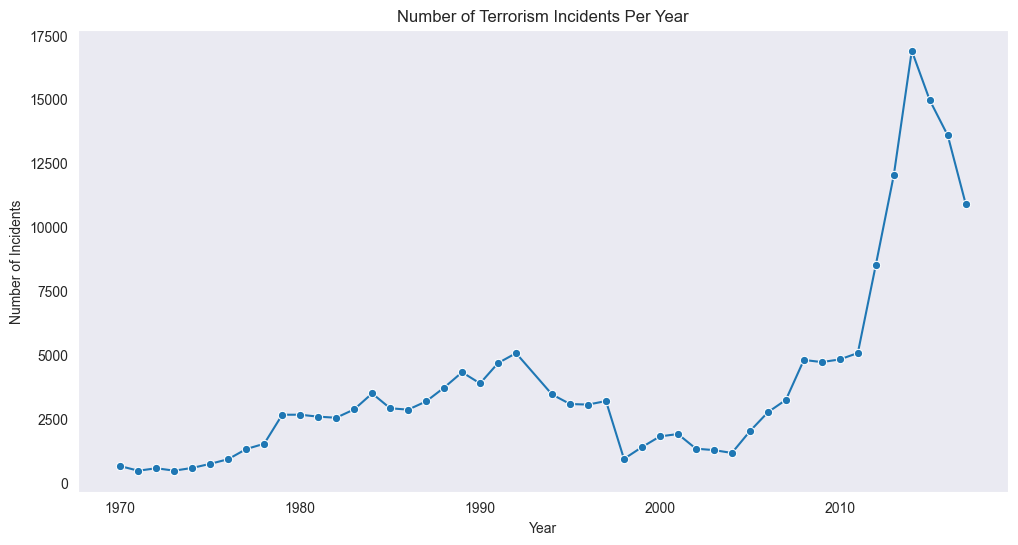

In [51]:
# Count incidents per year
yearly_trends = df.groupby('iyear').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o')
plt.title('Number of Terrorism Incidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()

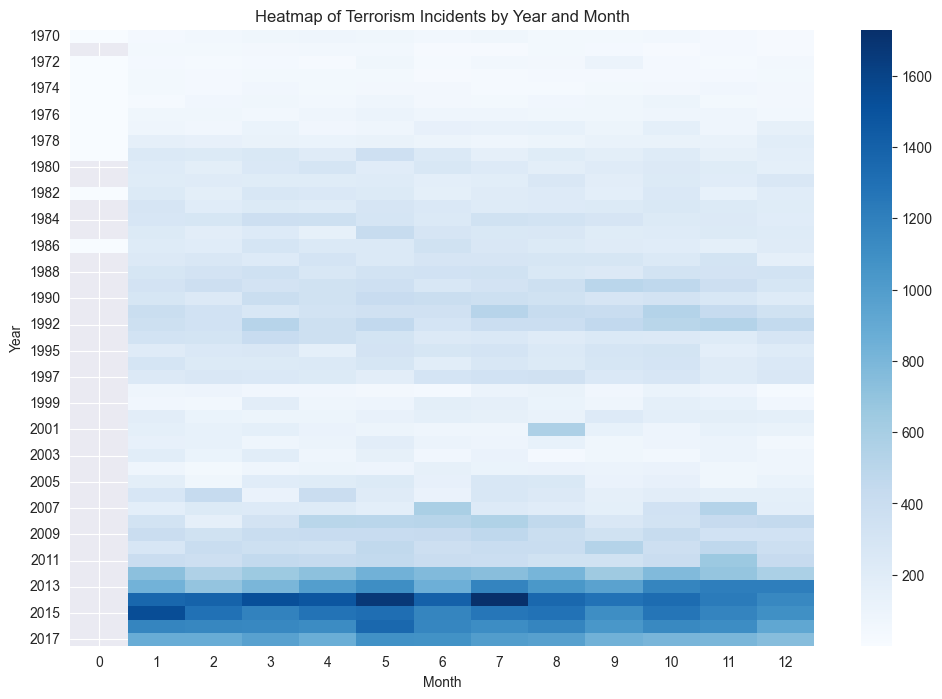

In [55]:
heatmap_data = df.groupby(['iyear', 'imonth']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, cbar=True)
plt.title('Heatmap of Terrorism Incidents by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()